# Imersão de Dados 4 - Alura - Desafios Dia 4

In [10]:
import pandas as pd

In [11]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.1 MB/s 
     |████████████████████████████████| 6.3 MB 31.4 MB/s 
     |████████████████████████████████| 16.7 MB 466 kB/s 


In [13]:
import geopandas as gpd

In [8]:
geo_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/dados_geo.csv")
geo_data.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,Valor_mm,Valor_m2,rua,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.0,NaN,7.00,7000.000000,Avenida Itacira,4061000.0,-23.615793,-46.648162,POINT (-46.6481622 -23.6157934),3.550309e+14
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.0,NaN,3.70,7459.677419,Rua Aurelia Perez Alvarez,4642020.0,-23.640961,-46.688311,POINT (-46.6883114 -23.6409612),3.550309e+14
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.0,NaN,0.38,3040.000000,Rua Alba Valdez,4845200.0,-23.752990,-46.695889,POINT (-46.6958895 -23.75299),3.550308e+14
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.0,NaN,0.54,5400.000000,Rua Tobias Barreto,3176000.0,-23.549960,-46.588173,POINT (-46.5881729 -23.5499597),3.550308e+14
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.0,NaN,1.98,4500.000000,Rua Graham Bell,4737030.0,-23.593796,-46.760077,POINT (-46.7600773 -23.5937964),3.550309e+14


In [19]:
ibge_url = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"
data_ibge = pd.read_csv(ibge_url, encoding="ISO-8859-1", sep=";", thousands=".", decimal=",")
data_ibge.dropna(how="all", axis=1, inplace=True)
data_ibge.head()

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


## Pre-processing

In [20]:
data_censo = pd.merge(
    left=geo_data[geo_data["setor_censo"].notnull()],
    right=data_ibge,
    how="left",
    left_on="setor_censo",
    right_on="Cod_setor"
)
data_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.0,NaN,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.0,NaN,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.0,NaN,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.0,NaN,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.0,NaN,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,R$ 960.000,960000.0,NaN,...,2.17,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35
5316,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,1500000.0,NaN,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5317,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,665000.0,NaN,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5318,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,1050000.0,NaN,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


In [36]:
data_censo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 5319
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rua                    5320 non-null   object 
 1   Bairro                 5312 non-null   object 
 2   Cidade                 5320 non-null   object 
 3   Metragem               5320 non-null   int64  
 4   Quartos                5320 non-null   int64  
 5   Banheiros              5320 non-null   int64  
 6   Vagas                  5320 non-null   int64  
 7   Valor                  5320 non-null   object 
 8   Valor_anuncio          5320 non-null   float64
 9   Tipo_anuncio           0 non-null      float64
 10  Valor_mm               5320 non-null   float64
 11  Valor_m2               5320 non-null   float64
 12  rua                    5320 non-null   object 
 13  cep                    5320 non-null   float64
 14  latitude               5320 non-null   float64
 15  long

## 1 - Carry out an analysis of IBGE data by map, analyzing income distribution.

In [14]:
sir_data = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/datasets/35SEE250GC_SIR.shp")
sir_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 68296 entries, 0 to 68295
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          68296 non-null  float64 
 1   CD_GEOCODI  68296 non-null  object  
 2   TIPO        68296 non-null  object  
 3   CD_GEOCODS  68296 non-null  object  
 4   NM_SUBDIST  0 non-null      object  
 5   CD_GEOCODD  68296 non-null  object  
 6   NM_DISTRIT  68296 non-null  object  
 7   CD_GEOCODM  68296 non-null  object  
 8   NM_MUNICIP  68296 non-null  object  
 9   NM_MICRO    68296 non-null  object  
 10  NM_MESO     68296 non-null  object  
 11  CD_GEOCODB  18797 non-null  object  
 12  NM_BAIRRO   18797 non-null  object  
 13  ID1         68296 non-null  int64   
 14  geometry    68296 non-null  geometry
dtypes: float64(1), geometry(1), int64(1), object(12)
memory usage: 7.8+ MB


In [17]:
sir_data["CD_GEOCODD"] = sir_data["CD_GEOCODD"].astype(float)
sir_data_sp = sir_data[sir_data["NM_MUNICIP"] == "SÃO PAULO"]
sir_data_sp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 18953 entries, 42322 to 62384
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          18953 non-null  float64 
 1   CD_GEOCODI  18953 non-null  object  
 2   TIPO        18953 non-null  object  
 3   CD_GEOCODS  18953 non-null  object  
 4   NM_SUBDIST  0 non-null      object  
 5   CD_GEOCODD  18953 non-null  float64 
 6   NM_DISTRIT  18953 non-null  object  
 7   CD_GEOCODM  18953 non-null  object  
 8   NM_MUNICIP  18953 non-null  object  
 9   NM_MICRO    18953 non-null  object  
 10  NM_MESO     18953 non-null  object  
 11  CD_GEOCODB  0 non-null      object  
 12  NM_BAIRRO   0 non-null      object  
 13  ID1         18953 non-null  int64   
 14  geometry    18953 non-null  geometry
dtypes: float64(2), geometry(1), int64(1), object(11)
memory usage: 2.3+ MB


In [46]:
geo_data_sp = pd.merge(left=sir_data_sp, right=data_censo[["Cod_distrito", "V005", "Valor_anuncio", "Valor_m2"]], how="left", left_on="CD_GEOCODD", right_on="Cod_distrito").drop_duplicates(subset=sir_data_sp.columns)
geo_data_sp

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry,Cod_distrito,V005,Valor_anuncio,Valor_m2
0,109347.0,355030804000079,URBANO,35503080400,None,355030804.0,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42323,"POLYGON ((-46.51778 -23.57947, -46.51786 -23.5...",355030804.0,1785.75,600000.0,4000.000000
25,109348.0,355030804000080,URBANO,35503080400,None,355030804.0,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42324,"POLYGON ((-46.51888 -23.57967, -46.51908 -23.5...",355030804.0,1785.75,600000.0,4000.000000
50,109349.0,355030804000081,URBANO,35503080400,None,355030804.0,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42325,"POLYGON ((-46.52015 -23.58105, -46.52026 -23.5...",355030804.0,1785.75,600000.0,4000.000000
75,109350.0,355030804000082,URBANO,35503080400,None,355030804.0,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42326,"POLYGON ((-46.52140 -23.57992, -46.52144 -23.5...",355030804.0,1785.75,600000.0,4000.000000
100,109351.0,355030804000083,URBANO,35503080400,None,355030804.0,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42327,"POLYGON ((-46.52371 -23.58185, -46.52384 -23.5...",355030804.0,1785.75,600000.0,4000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958126,127887.0,355030896000243,URBANO,35503089600,None,355030896.0,LAJEADO,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,62381,"POLYGON ((-46.38853 -23.54385, -46.38852 -23.5...",355030896.0,866.21,325000.0,1911.764706
958129,127888.0,355030896000244,URBANO,35503089600,None,355030896.0,LAJEADO,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,62382,"POLYGON ((-46.38810 -23.54514, -46.38810 -23.5...",355030896.0,866.21,325000.0,1911.764706
958132,127889.0,355030896000245,URBANO,35503089600,None,355030896.0,LAJEADO,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,62383,"POLYGON ((-46.42363 -23.52079, -46.42341 -23.5...",355030896.0,866.21,325000.0,1911.764706
958135,127890.0,355030896000246,URBANO,35503089600,None,355030896.0,LAJEADO,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,62384,"POLYGON ((-46.42242 -23.52122, -46.42209 -23.5...",355030896.0,866.21,325000.0,1911.764706


Observing the following chart, we can conclude that income distribution is concentrated in the most expensive districts.

In [29]:
sp_city = geo_data_sp[geo_data_sp["NM_MUNICIP"] == "SÃO PAULO"].reset_index(drop=True)
ax2 = sp_city.plot(figsize=(40,40), column="V005", cmap="Blues", edgecolor="gray", legend=True)
ax2.set_title("Setores Censitários - Cidade de São Paulo")

Output hidden; open in https://colab.research.google.com to view.

Text(0.5, 1.0, 'Setores Censitários - Bairro Vila Mariana')

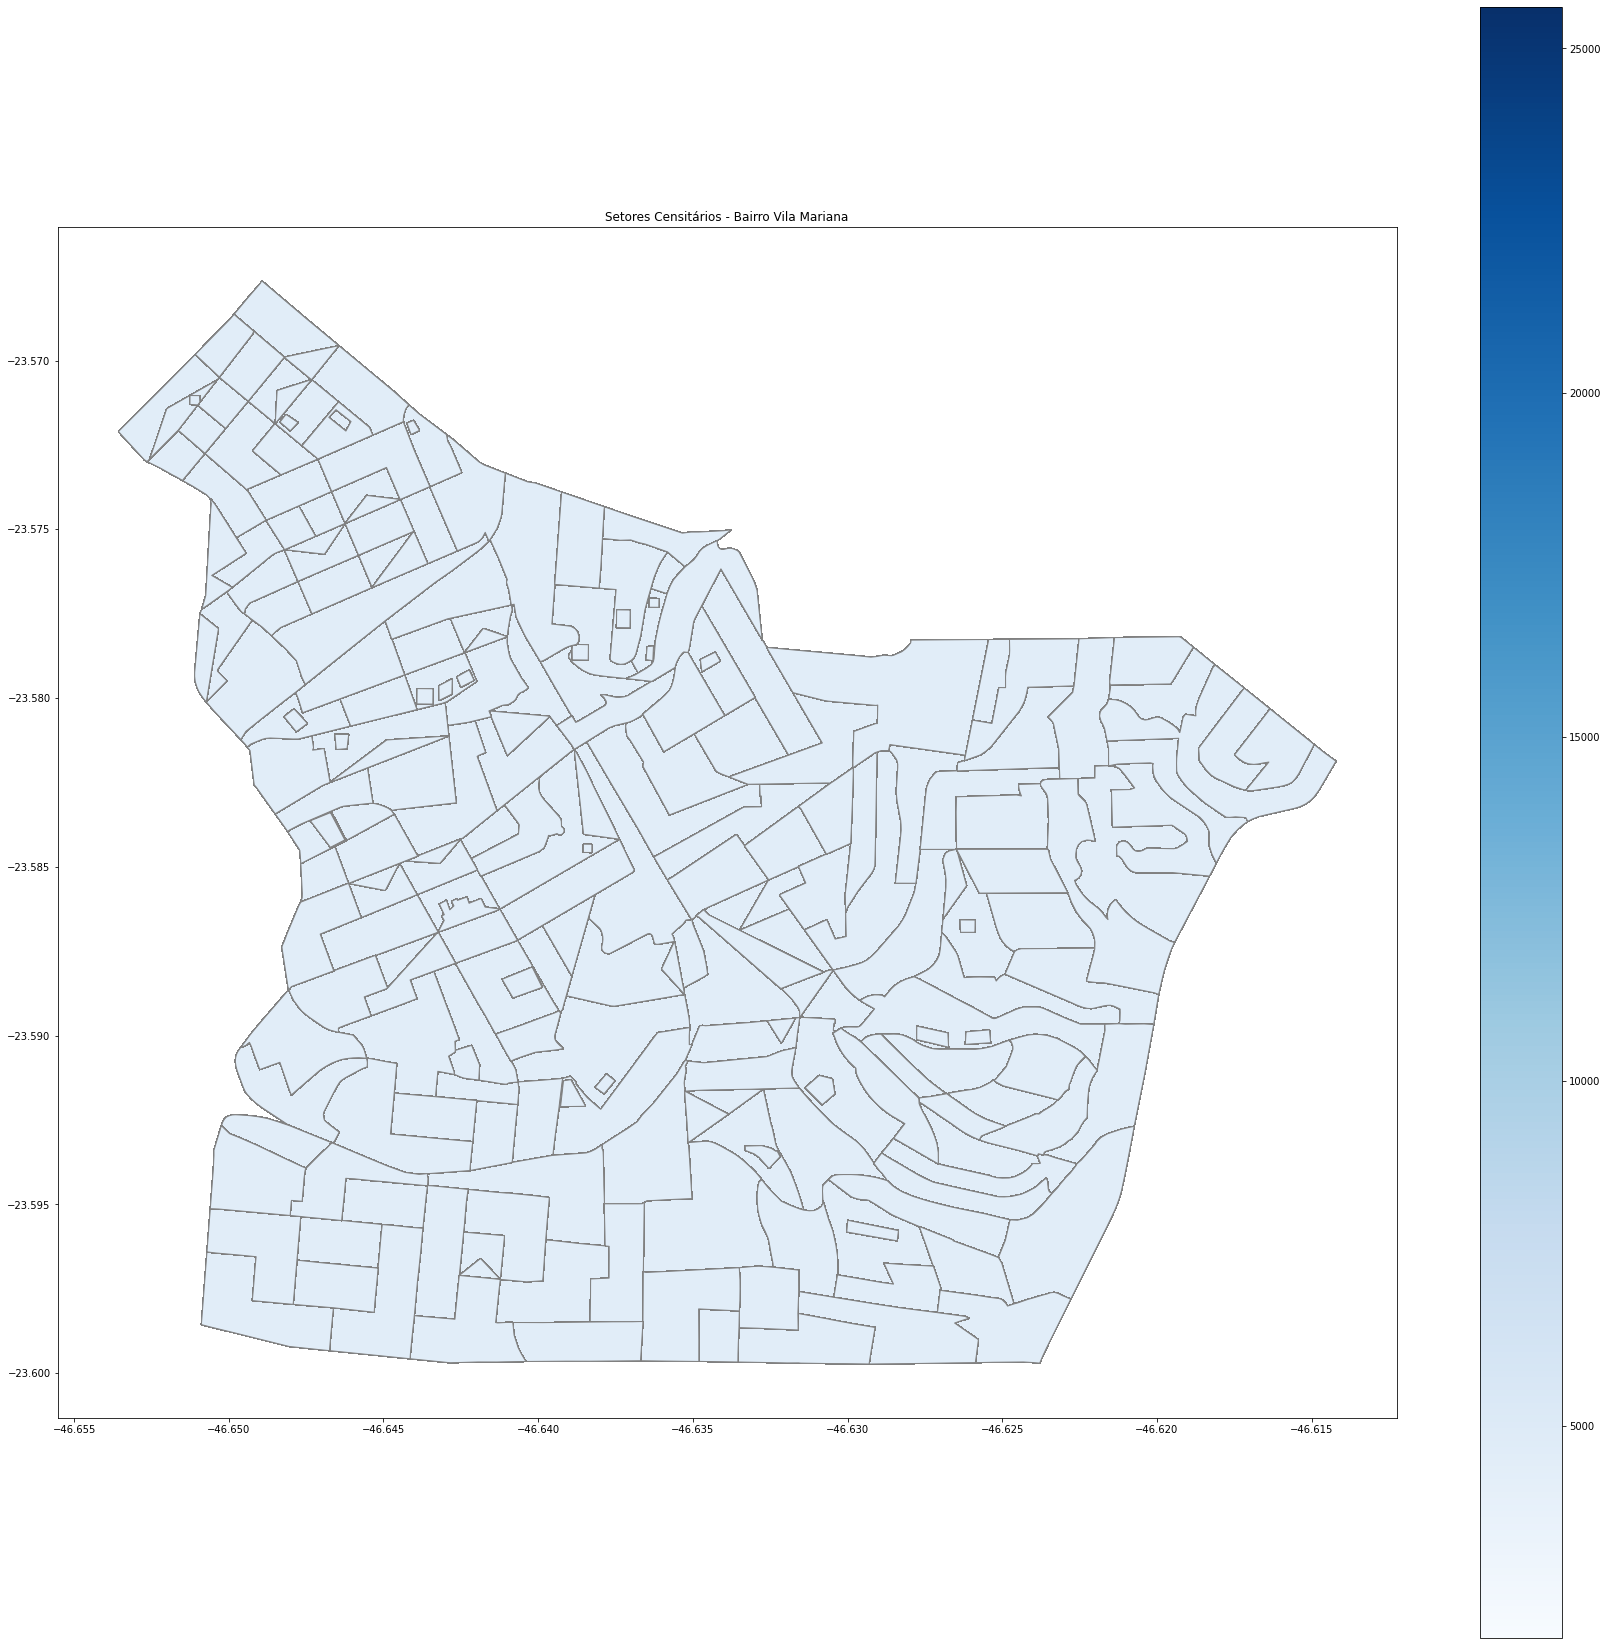

In [31]:
vilamariana = geo_data_sp[geo_data_sp["NM_DISTRIT"] == "VILA MARIANA"].reset_index(drop=True)
ax2 = vilamariana.plot(figsize=(30,30), column="V005", cmap="Blues", edgecolor="gray", legend=True)
ax2.set_title("Setores Censitários - Bairro Vila Mariana")

## 3 - Deepen the analysis between sales and income data.

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Most people earn up to R\$ 4,000.00; however, the square meter price of the vast majority of properties is R\$ 4,000.00.

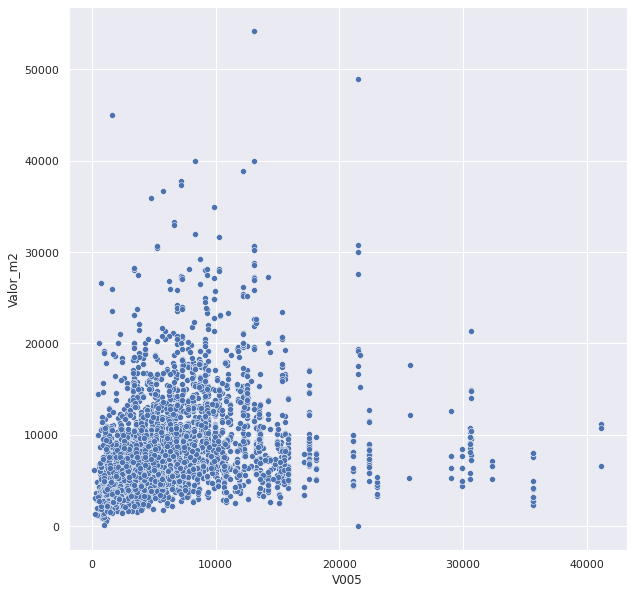

In [100]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_censo, x="V005", y="Valor_m2")

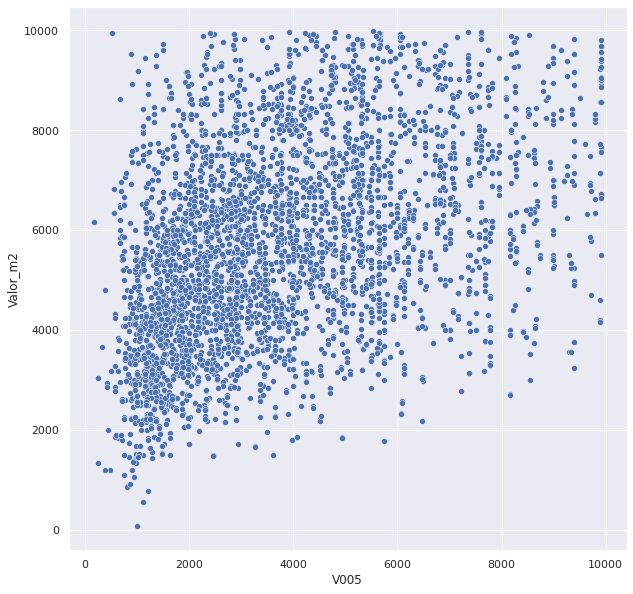

In [99]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_censo.query("Valor_m2 < 10000 & V005 < 10000"), x="V005", y="Valor_m2")

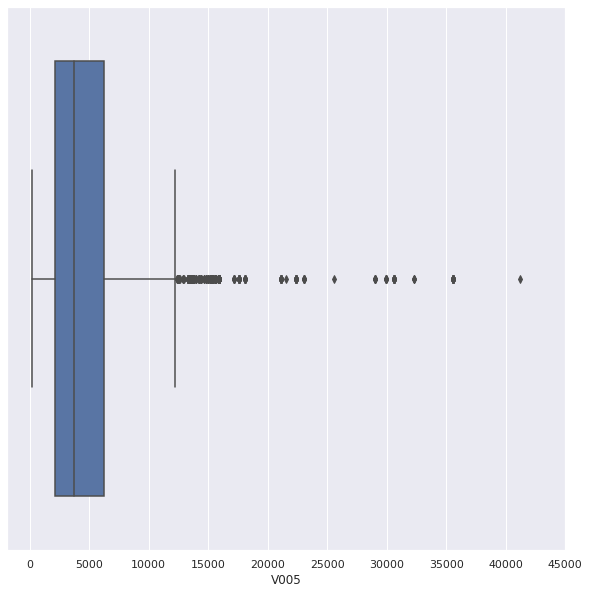

In [97]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(data=data_censo.query("Valor_m2 < 10000"), x="V005")
plt.xticks([5000 * i for i in range(10)])
plt.show()

## 4 - Carry out the exploratory analysis and find relevant variables to solve the problem.

In terms of property size, the sector situation is a very important variable to take into account since it is strongly correlated with property size. The income variables (V005, V007, V009, V011) are very important regarding property qualities (number of rooms, bathrooms, and parking spaces).

Besides, security data could be very interesting to analyze; however, such data is not available in the IBGE dataset.

<Figure size 720x720 with 0 Axes>

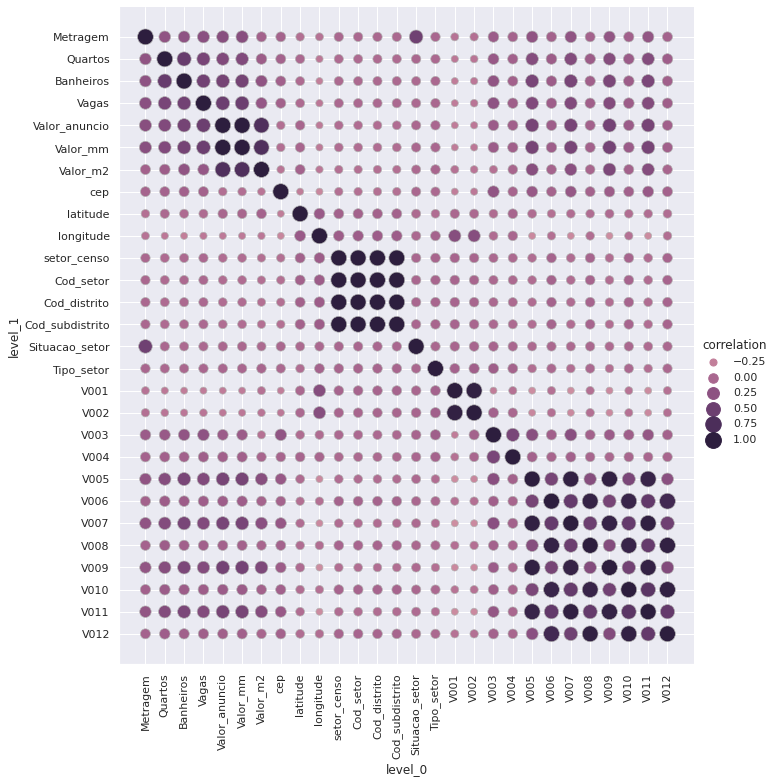

In [84]:
plt.figure(figsize=(10, 10))
corr_mat = data_censo.corr().stack().reset_index(name="correlation")
ax = sns.relplot(data=corr_mat, x="level_0", y="level_1", hue="correlation", size="correlation", hue_norm=(-1, 1), edgecolor=".7", height=10, sizes=(50, 250), size_norm=(-.2, .8))
plt.xticks(rotation=90)
plt.show()